In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 
import sys

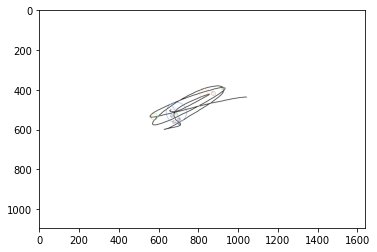

[<KeyPoint 0000024860D9D8D0>, <KeyPoint 0000024860D9D060>, <KeyPoint 0000024860D9DC00>, <KeyPoint 0000024860D9D8A0>, <KeyPoint 0000024860D9D870>, <KeyPoint 0000024860D9DD50>, <KeyPoint 0000024860D9DD20>, <KeyPoint 0000024860D9DD80>, <KeyPoint 0000024860D9DDB0>, <KeyPoint 0000024860D9DDE0>, <KeyPoint 0000024860D9DE10>, <KeyPoint 0000024860D9DE40>, <KeyPoint 0000024860D21A80>, <KeyPoint 0000024860D10E10>, <KeyPoint 0000024860D10690>, <KeyPoint 0000024860B61390>, <KeyPoint 0000024860B616F0>, <KeyPoint 0000024860B518D0>, <KeyPoint 0000024860B16B40>, <KeyPoint 000002485F5C3AE0>, <KeyPoint 000002485F5C3A80>, <KeyPoint 000002485F5C3570>, <KeyPoint 000002485F5C3480>, <KeyPoint 000002485F5C3420>, <KeyPoint 000002485F5C32D0>, <KeyPoint 000002485EFAB0F0>, <KeyPoint 000002485F579F00>, <KeyPoint 0000024848B1A780>, <KeyPoint 0000024848BA1D20>, <KeyPoint 0000024848BA1510>, <KeyPoint 0000024848BA1900>, <KeyPoint 0000024848BA18A0>, <KeyPoint 0000024848BA1930>, <KeyPoint 0000024860D5D9F0>, <KeyPoint 000

In [2]:
img = cv.imread("signature_1.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

img = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imwrite("sift_keypoints_1.jpg", img)

plt.imshow(img),plt.show()

print(kp)
print (len(kp))
print(des)
print (len(des))

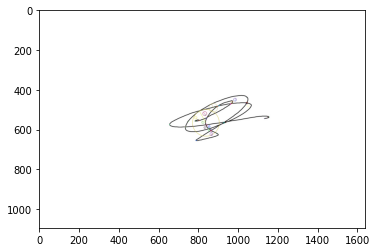

[<KeyPoint 0000024848B89180>, <KeyPoint 0000024848AAEF30>, <KeyPoint 0000024860DBF180>, <KeyPoint 0000024860DB2EA0>, <KeyPoint 0000024860DB2CC0>, <KeyPoint 0000024860DB2570>, <KeyPoint 0000024860DB2BA0>, <KeyPoint 0000024860DB2540>, <KeyPoint 0000024860DB2CF0>, <KeyPoint 0000024860DB2FC0>, <KeyPoint 0000024861155300>, <KeyPoint 0000024848B74DE0>, <KeyPoint 0000024848B74930>, <KeyPoint 0000024848B742D0>, <KeyPoint 0000024848B74690>, <KeyPoint 0000024848B74D50>, <KeyPoint 0000024848B74D20>, <KeyPoint 0000024848B749C0>, <KeyPoint 0000024848B747B0>, <KeyPoint 000002486110C6F0>, <KeyPoint 00000248610E8CF0>, <KeyPoint 00000248610E8CC0>, <KeyPoint 00000248610E8BD0>, <KeyPoint 00000248610E8D80>, <KeyPoint 00000248610E8C60>, <KeyPoint 0000024848B85B10>, <KeyPoint 0000024848B85090>, <KeyPoint 0000024848B85FC0>, <KeyPoint 0000024848B85AE0>, <KeyPoint 0000024860D9D2D0>, <KeyPoint 0000024860D9DAE0>, <KeyPoint 0000024860D9D9F0>, <KeyPoint 0000024860D9D660>, <KeyPoint 0000024860D9D630>, <KeyPoint 000

In [3]:
img2 = cv.imread("signature_2.jpg")
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift2 = cv.SIFT_create()
kp2, des2 = sift.detectAndCompute(gray2, None)

img2 = cv.drawKeypoints(gray2, kp2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite("sift_keypoints_2.jpg", img2)

plt.imshow(img2),plt.show()

print(kp2)
print (len(kp2))
print(des2)
print (len(des2))

In [4]:
#utilizando metodo de flann e knn
#match das features
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv.FlannBasedMatcher(index_params, search_params)

matches_flann = flann.knnMatch(des, des2, k=2)

pontos_validos = []
for m, n in matches_flann:
    if m.distance < 0.6*n.distance:
        good_points.append(m)

# Define how similar they are
number_keypoints = 0
if len(kp) <= len(kp2):
    number_keypoints = len(kp)
else:
    number_keypoints = len(kp2)


print("Keypoints 1ST Image: " + str(len(kp)))
print("Keypoints 2ND Image: " + str(len(kp2)))
print("GOOD Matches:", len(pontos_validos))
print("Match rating: ", len(pontos_validos) / number_keypoints * 100)

Keypoints 1ST Image: 84
Keypoints 2ND Image: 91
GOOD Matches: 10
How good it's the match:  11.904761904761903


In [ ]:
 """
 bf = cv.BFMatcher()
def calculateMatches(des,des2):
     matches = bf.knnMatch(des,des2,k=2)
     topResults = []
     for m,n in matches:
         if m.distance < 0.7*n.distance:
             topResults.append([m])
     return topResults
     """

In [ ]:

"""
bruteforce = cv.BFMatcher(cv.NORM_L1, crossCheck = True)

matches = bruteforce.match(des,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(gray, kp, gray2, kp2, matches[:34], gray2, flags=2)
plt.imshow(img3),plt.show()
cv.imwrite("bfmatches.jpg", img3)


print (len(matches))
"""

In [10]:

"""bf = cv.BFMatcher()
def calculateMatches(des,des2):
    matches = bf.knnMatch(des,des2,k=2)
    topResults1 = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            topResults1.append([m])
            
    matches = bf.knnMatch(des2,des,k=2)
    topResults2 = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            topResults2.append([m])
    
    topResults = []
    for match1 in topResults1:
        match1QueryIndex = match1[0].queryIdx
        match1TrainIndex = match1[0].trainIdx

        for match2 in topResults2:
            match2QueryIndex = match2[0].queryIdx
            match2TrainIndex = match2[0].trainIdx

            if (match1QueryIndex == match2TrainIndex) and (match1TrainIndex == match2QueryIndex):
                topResults.append(match1)
    return topResults

calculateMatches(des,des2)"""

[[<DMatch 0000022ECCD276F0>],
 [<DMatch 0000022ECCD27710>],
 [<DMatch 0000022ECCD0F210>],
 [<DMatch 0000022ECCC9C3F0>],
 [<DMatch 0000022ECCC9C230>],
 [<DMatch 0000022ECCC0AFB0>],
 [<DMatch 0000022ECCC0ACF0>]]